In [ ]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with pm.Model() as x:
    x = pm.Normal('x', mu=0, sigma=1)

In [3]:
x.logp({'x': 0})

array(-0.91893853)

In [4]:
with pm.Model() as model:
    mu=pm.Normal('mu',mu=0,sigma=1)
    obs = pm.Normal('x', mu=mu, sigma=1, observed=np.random.randn(100))
    estimator=pm.find_MAP()
    

/home/zhangxk/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -149.48, ||grad|| = 4.7135: 100%|██████████| 4/4 [00:00<00:00, 80.26it/s]


In [5]:
print(estimator)

{'mu': array(-0.04666838)}


In [6]:
with pm.Model() as model:
    x = pm.Uniform('x', lower=0, upper=1)

In [7]:
model.deterministics

[x]

In [8]:
#假设Z~uniform[-1,1],P=sigma(z),Y~Berli(prob=P),
#构造的数据应该是N个观测(0,1)

N=100
z=-0.3
p=1/(1+np.exp(-z))
y=np.random.choice(2,N,p=[1-p,p])

# 构造以上模型
with pm.Model() as model:
    Z=pm.Uniform(name='Z',lower=-1,upper=1) #假设先验取自[-1,1]
    P=pm.invlogit(Z)
    Y=pm.Bernoulli(name='Y',p=P,observed=y)
    print('所有的随机变量',model.basic_RVs)
    print('非观测的随机变量',model.free_RVs)
    print('观测的随机变量',model.observed_RVs)
    print('确定的随机变量',model.deterministics)
    estimator=pm.find_MAP()
    print(estimator)

所有的随机变量 [Z_interval__, Y]
非观测的随机变量 [Z_interval__]
观测的随机变量 [Y]
确定的随机变量 [Z]


/home/zhangxk/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -70.008, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<00:00, 1082.26it/s]

{'Z_interval__': array(-0.24145442), 'Z': array(-0.12014407)}


In [9]:
# 以上例子可以来进一步复杂
N=1000
x=np.random.randn(N,2)
z1,z2,z3=-0.5,0.4,-0.2
xz=z1+z2*x[:,0]+z3*x[:,1]
p=1/(np.exp(-xz)+1)
y=[np.random.choice(2,p=[1-prob,prob]) for prob in p]
with pm.Model() as model:
    Z1=pm.Uniform(name='Z1',lower=-1,upper=1)
    Z2=pm.Uniform(name='Z2',lower=-1,upper=1)
    Z3=pm.Uniform(name='Z3',lower=-1,upper=1)
    
    XZ=Z1+Z2*x[:,0]+Z3*x[:,1]
    P=pm.invlogit(XZ)
    Y=pm.Bernoulli(name='Y',p=P,shape=N,observed=y)
    print('所有的随机变量',model.basic_RVs)
    print('非观测的随机变量',model.free_RVs)
    print('观测的随机变量',model.observed_RVs)
    print('确定的随机变量',model.deterministics)
    estimator=pm.find_MAP()
    print(estimator)

所有的随机变量 [Z1_interval__, Z2_interval__, Z3_interval__, Y]
非观测的随机变量 [Z1_interval__, Z2_interval__, Z3_interval__]
观测的随机变量 [Y]
确定的随机变量 [Z1, Z2, Z3]


/home/zhangxk/anaconda3/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -695.23, ||grad|| = 76.983: 100%|██████████| 9/9 [00:00<00:00, 1116.17it/s]

{'Z1_interval__': array(-1.11165656), 'Z2_interval__': array(0.8145298), 'Z3_interval__': array(-0.36836057), 'Z1': array(-0.50487563), 'Z2': array(0.38614787), 'Z3': array(-0.18212555)}


## MCMC

In [16]:
#列出所有的采用方法
list(filter(lambda x:x[0].isupper(),dir(pm.step_methods)))

y=observed=np.random.randn(100)+3
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=1, observed=y)

    trace = pm.sample(1000,step=pm.Metropolis(), tune=500,cores=4)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [mu]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5634.92draws/s]
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2eabdc278>,
      dtype=object)

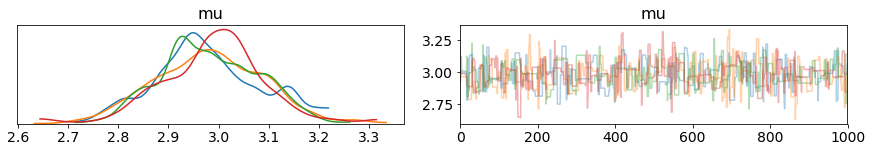

In [17]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2eb2a1c88>],
      dtype=object)

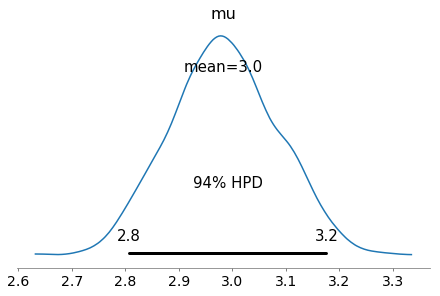

In [18]:
pm.plot_posterior(trace)

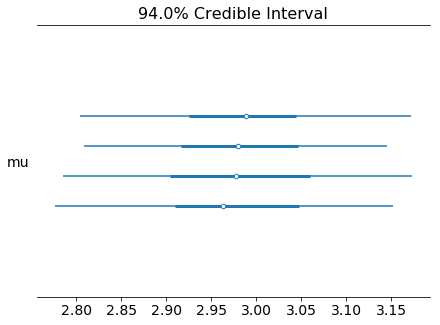

In [19]:
pm.forestplot(trace);

In [58]:
################
# 以上例子可以来进一步复杂
N=1000
x=np.random.randn(N,2)
z1,z2,z3=-0.5,0.4,-0.2
xz=z1+z2*x[:,0]+z3*x[:,1]
p=1/(np.exp(-xz)+1)
y=[np.random.choice(2,p=[1-prob,prob]) for prob in p]
with pm.Model() as model:
    ALPHA=pm.Normal('alpha',0,2)
    BETA=pm.Normal('beta',0,2,shape=2)
    XZ=BETA.dot(x.T)+ALPHA
    P=pm.invlogit(XZ)
    Y=pm.Bernoulli(name='Y',p=P,shape=N,observed=y)
    print('所有的随机变量',model.basic_RVs)
    print('非观测的随机变量',model.free_RVs)
    print('观测的随机变量',model.observed_RVs)
    print('确定的随机变量',model.deterministics)
#     estimator=pm.find_MAP()
#     print(estimator)
    trace=pm.sample(1000,step=pm.Metropolis(),cores=4)

所有的随机变量 [alpha, beta, Y]
非观测的随机变量 [alpha, beta]
观测的随机变量 [Y]
确定的随机变量 []


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [beta]
>Metropolis: [alpha]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1934.56draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2cc69c8d0>,
      dtype=object)

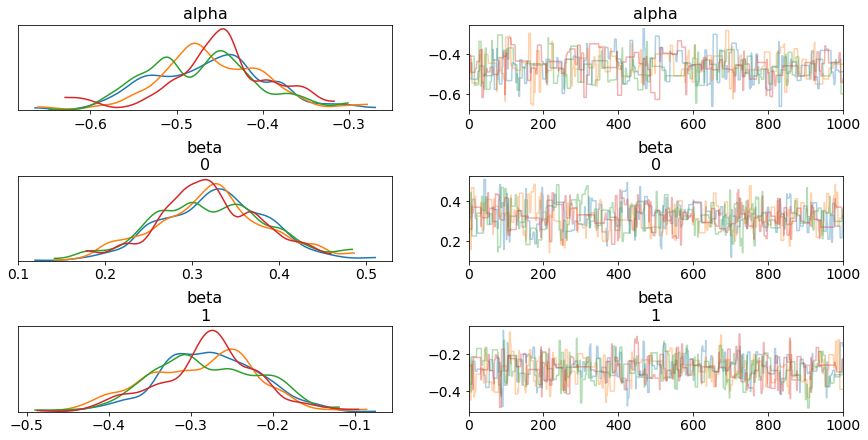

In [59]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2d46887b8>,
      dtype=object)

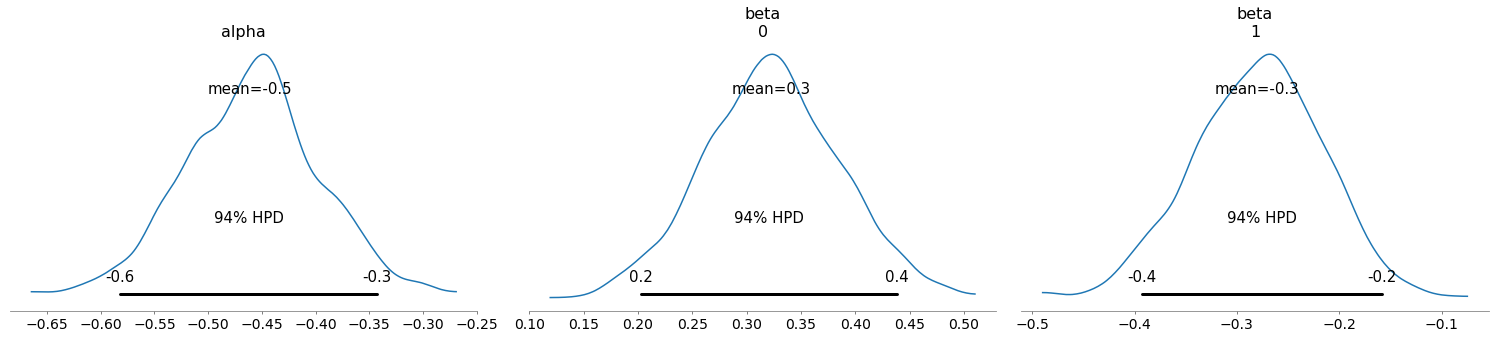

In [60]:
pm.plot_posterior(trace)

In [61]:
trace['beta']

array([[ 0.43885584, -0.23461285],
       [ 0.2408798 , -0.35164279],
       [ 0.32157943, -0.36212107],
       ...,
       [ 0.32503029, -0.22749187],
       [ 0.32503029, -0.22749187],
       [ 0.32503029, -0.22749187]])